In [1]:
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
# %run "classes_ipynb.ipynb"
sys.path.insert(0, "..")
import classes3
warnings.filterwarnings('ignore')

In [2]:
phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h = sp.symbols('phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h')
model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
t1 = [-0.1,-0.3]
s1 = [0,-0.2]
s2 = [0.12,-0.1]
h2 = [0.08,0]
l01 = np.sqrt((s1[0]-t1[0])**2+(s1[1]-t1[1])**2)
l02 = np.sqrt((h2[0]-s2[0])**2+(h2[1]-s2[1])**2)
print(l01,l02)

0.1414213562373095 0.10770329614269009


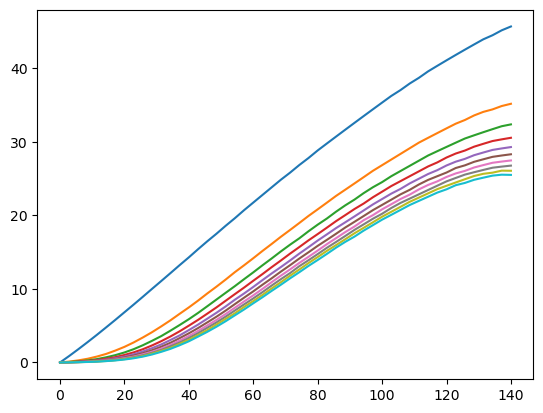

In [15]:
F_iso = np.linspace(1,100,10)
for i,F_iso in enumerate(F_iso):
    model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model.add_muscle(l0=l01,F_iso = F_iso,epsm0 = 0.6,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Thelen')
    # model.add_muscle(l0=0.68,F_iso = 1,epsm0 = 0.55,scap_ins=s,thorax_ins = t,muscle_group = 'ThorScap')
    model.add_muscle(l0=l02,epsm0 = 0.5,scap_ins=s2,humer_ins=h2,muscle_group = 'ScapHum',muscle_model='Thelen')
    # print(len(model.U_muscles))
    U_celk_np = model.potential_energy()
    phis_opt, alfa_vec = model.scapula_position(U_celk_np)
    plt.plot(alfa_vec*180/np.pi,phis_opt*180/np.pi)
plt.show()


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


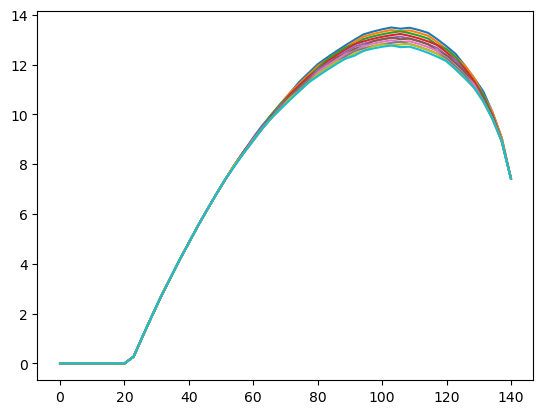

In [18]:
F_iso = np.linspace(0.1,1,10)
print(F_iso)
for i,F_iso in enumerate(F_iso):
    model = classes3.SCHR(phis=phis,alfa=alfa,x=x)
    model.add_muscle(l0=l01+0.02,    F_iso = F_iso,scap_ins=s1,thorax_ins=t1,muscle_group = 'ThorScap',muscle_model='Mclean')
    model.add_muscle(l0=l01,F_iso = 1,scap_ins=s1,thorax_ins = t1,muscle_group = 'ThorScap',muscle_model='Mclean')
    model.add_muscle(l0=l02+0.03,epsm0 = 0.5,scap_ins=s2,humer_ins=h2,muscle_group = 'ScapHum',muscle_model='Mclean')
    # print(len(model.U_muscles))
    U_celk_np = model.potential_energy()
    phis_opt, alfa_vec = model.scapula_position(U_celk_np)
    plt.plot(alfa_vec*180/np.pi,phis_opt*180/np.pi)
plt.show()